# $$Exploratory Data Analysis$$

In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [2]:
import os

import pandas as pd
from collections import Counter

# %matplotlib qt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
import tensorflow as tf

import cv2

### Load data

In [3]:
DATA_DIR = '/home/daitran/Desktop/git/soil_properties/data'

In [4]:
ntb_data_path = os.path.join(DATA_DIR, 'NTB_black_data_remove_class_5.csv')
tb_data_path = os.path.join(DATA_DIR, '210507 TB (Blue) data_(PDF and CAD).csv')

In [5]:
ntb_data= pd.read_csv(ntb_data_path)
tb_data = pd.read_csv(tb_data_path)

### Data pre-processing

In [6]:
ntb_data

,Name,X,Y,Elevation,Soi properties (main),Unnamed: 5,Update evlevation,Elevation past
0,NTB-1,549723.89,213802.88,128.5,reclaimed layer,NaN,128.5,28.5
1,NTB-1,549723.89,213802.88,126.0,sedimentary layer,NaN,126.0,26.0
2,NTB-1,549723.89,213802.88,121.5,weathered soil,NaN,121.5,21.5
3,NTB-1,549723.89,213802.88,107.7,weathered rock,NaN,107.7,7.7
4,NTB-1,549723.89,213802.88,99.7,soft rock,NaN,99.7,-0.3
...,...,...,...,...,...,...,...,...
90,NTB-12,549564.60,213804.70,114.5,weathered rock,NaN,114.5,14.5
91,NTB-12,549564.60,213804.70,107.5,moderate rock,NaN,107.5,7.5
92,NTB-12,549564.60,213804.70,89.5,hard rock,NaN,89.5,-10.5
93,NTB-12,549564.60,213804.70,86.5,moderate rock,NaN,86.5,-13.5


In [7]:
tb_data

,Name,X,Y,Elevation,Soi properties (main),Unnamed: 5,Unnamed: 6,X1(CAD),Y1(CAD)
0,TB-1,549699.0411,213765.3279,128.60,reclaimed layer,NaN,NaN,549699.0411,213765.3279
1,TB-1,549699.0411,213765.3279,126.60,sedimentary layer,NaN,NaN,549699.0411,213765.3279
2,TB-1,549699.0411,213765.3279,117.60,weathered soil,NaN,NaN,549699.0411,213765.3279
3,TB-1,549699.0411,213765.3279,108.10,weathered rock,NaN,NaN,549699.0411,213765.3279
4,TB-1,549699.0411,213765.3279,94.60,soft rock,NaN,NaN,549699.0411,213765.3279
...,...,...,...,...,...,...,...,...,...
111,TB-22,550622.5600,213730.7000,134.49,reclaimed layer,NaN,NaN,550626.9000,213737.3069
112,TB-22,550622.5600,213730.7000,114.19,weathered soil,NaN,NaN,550626.9000,213737.3069
113,TB-22,550622.5600,213730.7000,104.19,weathered rock,NaN,NaN,550626.9000,213737.3069
114,TB-22,550622.5600,213730.7000,93.69,soft rock,NaN,NaN,550626.9000,213737.3069


In [8]:
np.unique(ntb_data['Name'])

array(['NTB-1', 'NTB-1-1', 'NTB-10', 'NTB-11', 'NTB-12', 'NTB-2', 'NTB-3',
       'NTB-4', 'NTB-5', 'NTB-6', 'NTB-7', 'NTB-7-1', 'NTB-8', 'NTB-9'],
      dtype=object)

In [9]:
# remove_piles = ['NTB-6', 'NTB-7', 'NTB-7-1','NTB-8', 'NTB-9', 'NTB-10', 'NTB-11', 'NTB-12']

# for remove_pile in remove_piles: 
#     indexNames = ntb_data[(ntb_data['Name'] == remove_pile)].index
#     ntb_data.drop(indexNames , inplace=True)
    
    

In [10]:
ntb_data

,Name,X,Y,Elevation,Soi properties (main),Unnamed: 5,Update evlevation,Elevation past
0,NTB-1,549723.89,213802.88,128.5,reclaimed layer,NaN,128.5,28.5
1,NTB-1,549723.89,213802.88,126.0,sedimentary layer,NaN,126.0,26.0
2,NTB-1,549723.89,213802.88,121.5,weathered soil,NaN,121.5,21.5
3,NTB-1,549723.89,213802.88,107.7,weathered rock,NaN,107.7,7.7
4,NTB-1,549723.89,213802.88,99.7,soft rock,NaN,99.7,-0.3
...,...,...,...,...,...,...,...,...
90,NTB-12,549564.60,213804.70,114.5,weathered rock,NaN,114.5,14.5
91,NTB-12,549564.60,213804.70,107.5,moderate rock,NaN,107.5,7.5
92,NTB-12,549564.60,213804.70,89.5,hard rock,NaN,89.5,-10.5
93,NTB-12,549564.60,213804.70,86.5,moderate rock,NaN,86.5,-13.5


In [11]:
np.unique(ntb_data['Name'])

array(['NTB-1', 'NTB-1-1', 'NTB-10', 'NTB-11', 'NTB-12', 'NTB-2', 'NTB-3',
       'NTB-4', 'NTB-5', 'NTB-6', 'NTB-7', 'NTB-7-1', 'NTB-8', 'NTB-9'],
      dtype=object)

In [12]:
remove_piles = ['TB-21', 'TB-22']

for remove_pile in remove_piles: 
    indexNames = tb_data[(tb_data['Name'] == remove_pile)].index
    tb_data.drop(indexNames , inplace=True)


In [13]:
tb_data

,Name,X,Y,Elevation,Soi properties (main),Unnamed: 5,Unnamed: 6,X1(CAD),Y1(CAD)
0,TB-1,549699.0411,213765.3279,128.60,reclaimed layer,NaN,NaN,549699.0411,213765.3279
1,TB-1,549699.0411,213765.3279,126.60,sedimentary layer,NaN,NaN,549699.0411,213765.3279
2,TB-1,549699.0411,213765.3279,117.60,weathered soil,NaN,NaN,549699.0411,213765.3279
3,TB-1,549699.0411,213765.3279,108.10,weathered rock,NaN,NaN,549699.0411,213765.3279
4,TB-1,549699.0411,213765.3279,94.60,soft rock,NaN,NaN,549699.0411,213765.3279
...,...,...,...,...,...,...,...,...,...
101,TB-20,550975.8900,213836.6400,129.75,weathered soil,NaN,NaN,550974.1386,213829.4167
102,TB-20,550975.8900,213836.6400,103.65,weathered rock,NaN,NaN,550974.1386,213829.4167
103,TB-20,550975.8900,213836.6400,94.85,soft rock,NaN,NaN,550974.1386,213829.4167
104,TB-20,550975.8900,213836.6400,90.55,moderate rock,NaN,NaN,550974.1386,213829.4167


In [14]:
np.unique(tb_data['Name'])

array(['TB-1', 'TB-10', 'TB-11', 'TB-12', 'TB-13', 'TB-14', 'TB-15',
       'TB-16', 'TB-17', 'TB-18', 'TB-19', 'TB-2', 'TB-20', 'TB-3',
       'TB-4', 'TB-5', 'TB-6', 'TB-7', 'TB-8', 'TB-9'], dtype=object)

### Convert target

In [15]:
ntb_names = ntb_data['Soi properties (main)']
tb_names = tb_data['Soi properties (main)']

In [16]:
assign_num_list = {
                    'topsoil layer': 7,
                    'reclaimed layer': 6,
                    'sedimentary layer': 5,
                    'weathered soil': 4,
                    'weathered rock': 3,
                    'soft rock': 2,
                    'moderate rock': 1,
                     'hard rock': 0,
                  }

In [17]:
ntb_target = ntb_names.replace(assign_num_list)
tb_target = tb_names.replace(assign_num_list)

In [18]:
ntb_data['Target'] = ntb_target
tb_data['Target'] = tb_target

In [19]:
X_train_ntb = ntb_data[['X','Y','Elevation']].to_numpy()
y_train_ntb = ntb_data['Target'].to_numpy()

X_train_tb = tb_data[['X1(CAD)','Y1(CAD)','Elevation']].to_numpy()
y_train_tb = tb_data['Target'].to_numpy()

In [20]:
merged_X = []
merged_y = []

merged_X = np.append(X_train_ntb, X_train_tb, axis = 0)
merged_y = np.append(y_train_ntb, y_train_tb, axis = 0)


### Unbalanced dataset

In [21]:
%pwd

'/home/daitran/Desktop/git/soil_properties'

In [22]:
# 900
X_900_1 = 549660
Y_900_1 = 213759

X_900_2 = 549653
Y_900_2 = 213828

# 1220
X_1220_1 = 550978
Y_1220_1 = 213825

X_1220_2 = 550974
Y_1220_2 = 213895

In [23]:
max_x = 550978
max_y = 213895

min_x = 549653
min_y = 213759

In [24]:
# max_x = np.max(merged_X[:,0])
# max_y = np.max(merged_X[:,1])

# min_x = np.min(merged_X[:,0])
# min_y = np.min(merged_X[:,1])

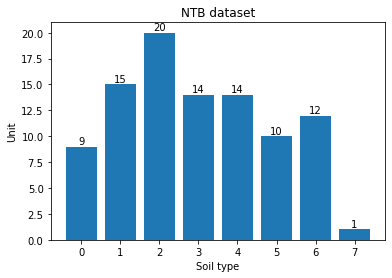

In [25]:
(unique, counts) = np.unique(y_train_ntb, return_counts=True)
frequencies = np.asarray((unique, counts)).T
plot = plt.bar(frequencies[:,0], frequencies[:,1])


# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
# Add labels and title
plt.title("NTB dataset")
plt.xlabel("Soil type")
plt.ylabel("Unit")

plt.show()

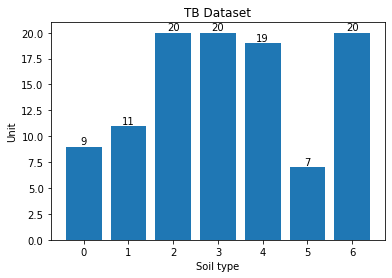

In [26]:
(unique, counts) = np.unique(y_train_tb, return_counts=True)
frequencies = np.asarray((unique, counts)).T
plot = plt.bar(frequencies[:,0], frequencies[:,1])

# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
# Add labels and title
plt.title("TB Dataset")
plt.xlabel("Soil type")
plt.ylabel("Unit")
plt.show()

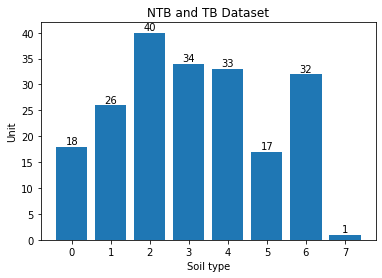

In [27]:
(unique, counts) = np.unique(merged_y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
plot = plt.bar(frequencies[:,0], frequencies[:,1])

# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
# Add labels and title
plt.title("NTB and TB Dataset")
plt.xlabel("Soil type")
plt.ylabel("Unit")
plt.show()

### Normalize

There are several ways to normalize dataset, we should try and check the results.

In [28]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# Minmax scaler
# Standart Scaler
# 

normalizer = preprocessing.MinMaxScaler()

normalizer.fit(merged_X)


normalized_X_train_ntb = normalizer.transform(X_train_ntb)
normalized_X_train_tb = normalizer.transform(X_train_tb)
# normalized_train_X

In [29]:
labels = {}
for k, v in assign_num_list.items():
    labels[v] = k

In [30]:
label_colours = ['black', 'brown', 'red', 'magenta',
                'pink', 'green',
                'blue','cyan']

### 3D Visualization

In [31]:
def plot_data(x, y, labels, colours):
    
    sns.set(style = "darkgrid")

    fig = plt.figure(figsize=(20, 10))
    
    ax = fig.add_subplot(121, projection='3d')

    for c in np.unique(y):
        inx = np.where(y == c)
        ax.scatter(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Elevation')
        plt.xlim([min_x, max_x])
        plt.ylim([min_y, max_y])
        ax.set_zlim(80, 140)
        
    ax = fig.add_subplot(122, projection='3d')
    for c in np.unique(y):
        inx = np.where(y == c)
        ax.scatter(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Elevation')
        ax.view_init(90, 0)   
        plt.xlim([min_x, max_x])
        plt.ylim([min_y, max_y])
        ax.set_zlim(80, 140)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    

### **NTB Black Dataset**

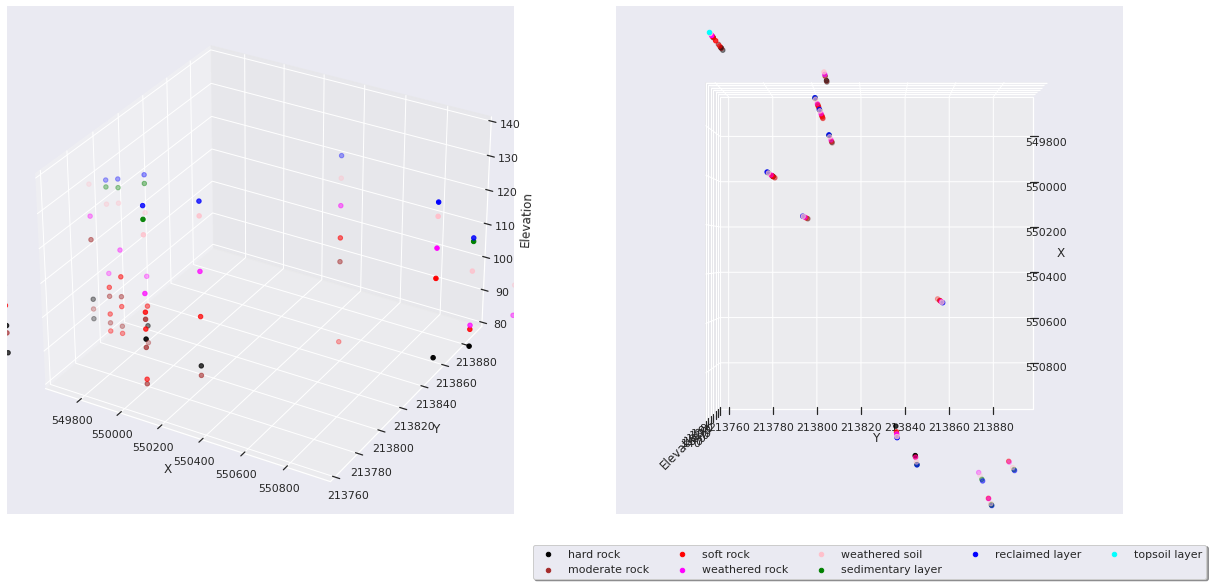

In [32]:
plot_data(X_train_ntb, y_train_ntb, labels, label_colours)
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/ntb.png', dpi = 300)

### **TB Blue Dataset**

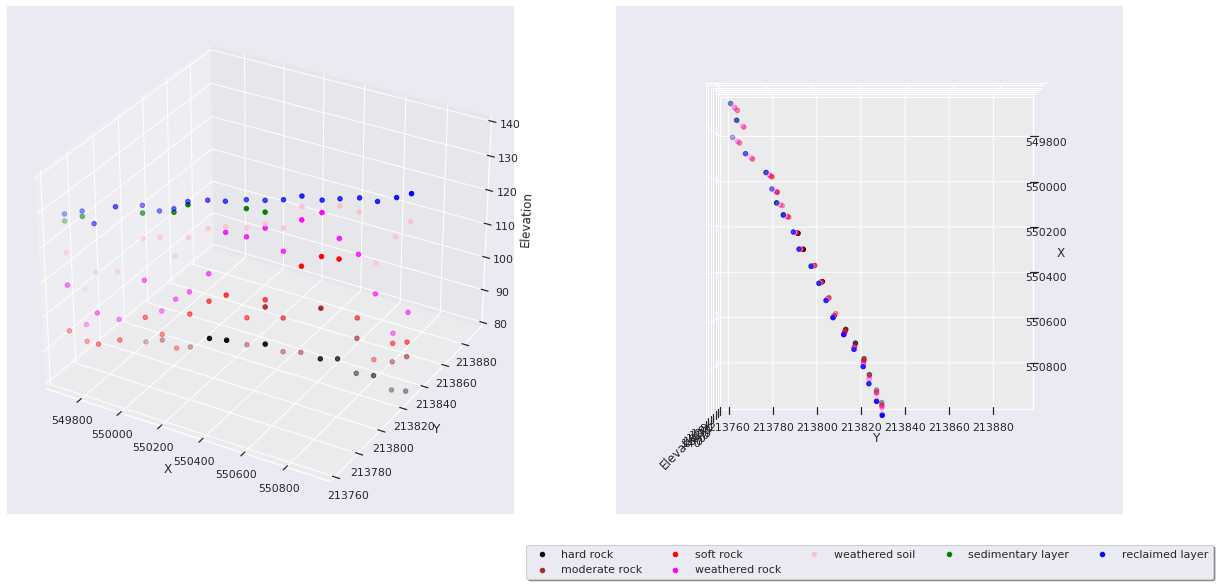

In [33]:
plot_data(X_train_tb, y_train_tb, labels, label_colours)
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/tb.png', dpi = 300)

### **Merged Dataset**

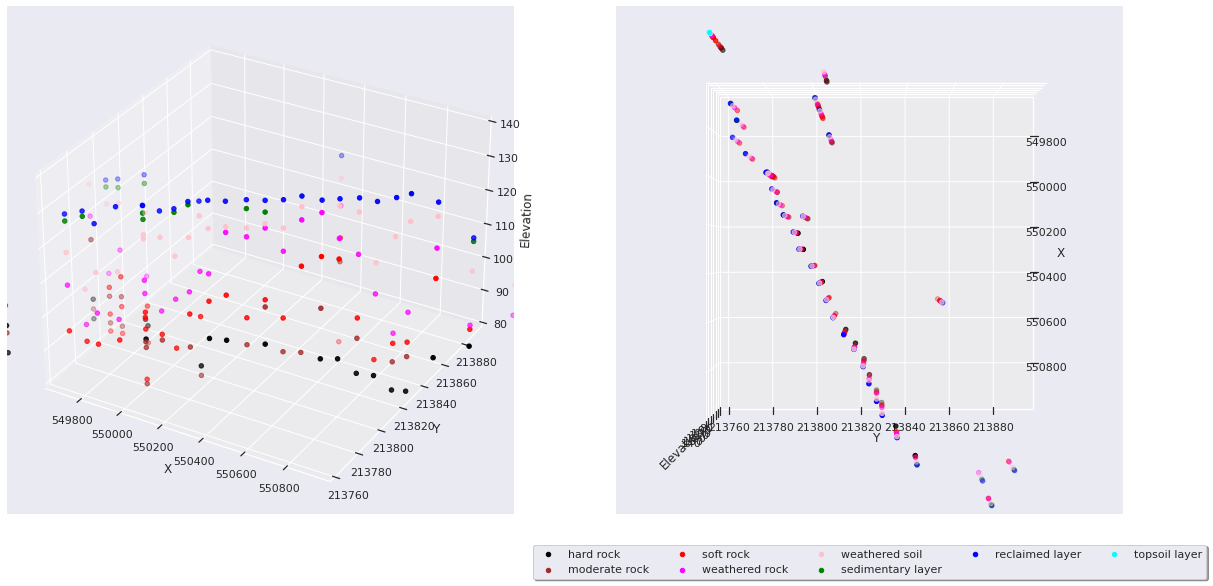

In [34]:
plot_data(merged_X, merged_y, labels, label_colours)
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/ntb-tb.png', dpi = 300)

# Filter and remain the inside area only

In [35]:
# 900
X_900_1 = 549660
Y_900_1 = 213759

X_900_2 = 549653
Y_900_2 = 213828

# 1220
X_1220_1 = 550978
Y_1220_1 = 213825

X_1220_2 = 550974
Y_1220_2 = 213895